In [1]:
%matplotlib inline 
#from __future__ import division
import __future__
import warnings
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from skimage.measure import label, regionprops, regionprops_table
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures

# Zadanie na 3.0

In [2]:
dt = io.imread('http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot00.jpg', as_gray=True)

In [3]:
from skimage.feature import canny
czar = filters.sobel(dt)

In [4]:
czar_2 = mp.erosion(mp.dilation(czar))

In [5]:
czar_3 = mp.erosion(mp.dilation(czar_2))

In [6]:
czar_4 = (mp.dilation(czar_3))

In [7]:
czar_5 = (mp.dilation(czar_4))

In [8]:
czar_6 = (mp.dilation(czar))

In [9]:
czar_7 = (mp.dilation(czar_6))

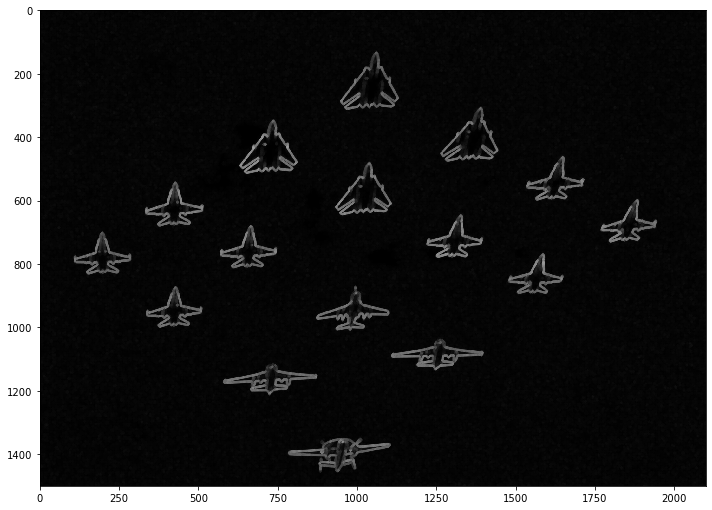

In [10]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
czar_8 = (mp.dilation(czar_7))
io.imshow(czar_8, cmap=plt.cm.gray)

# Zadanie na 5.0

In [11]:
from skimage.draw import polygon
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("output_final.pdf")

In [12]:
planes = [f'http://www.cs.put.poznan.pl/mtomczyk/kck/Lab4_images/planes/samolot{n:02}.jpg' for n in range(21)]

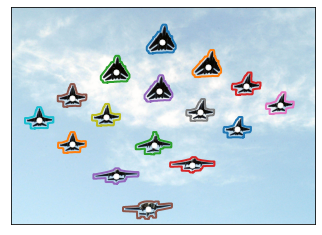

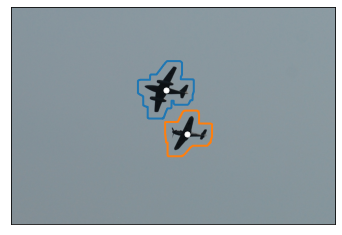

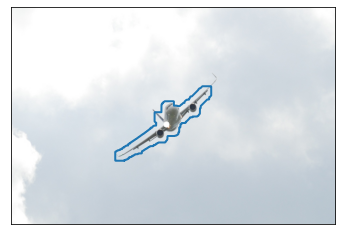

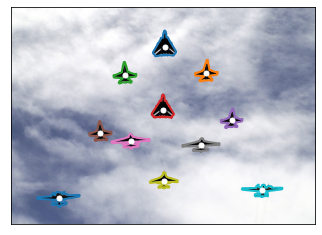

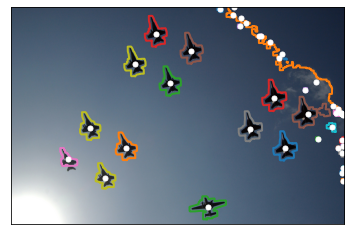

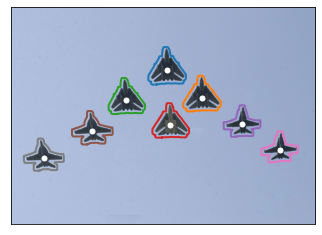

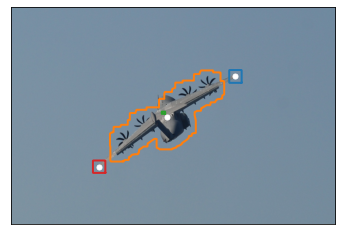

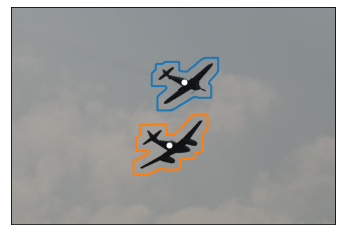

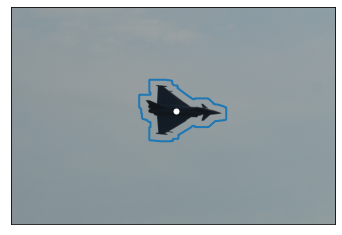

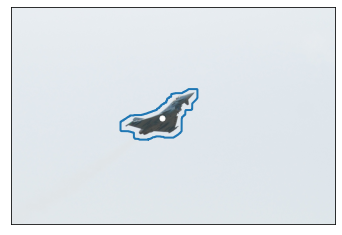

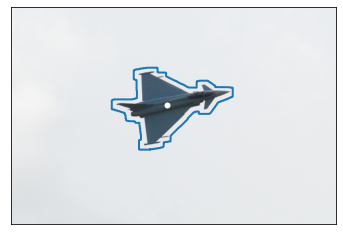

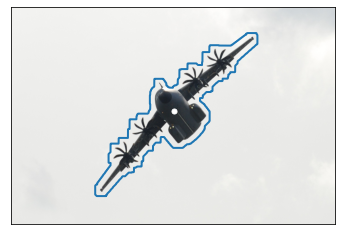

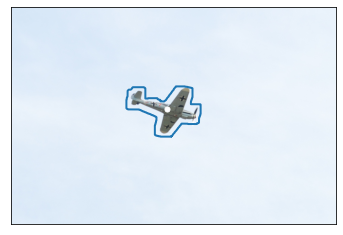

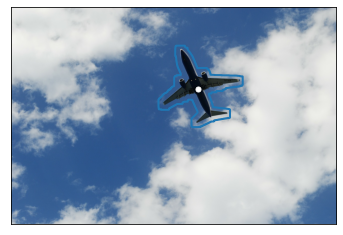

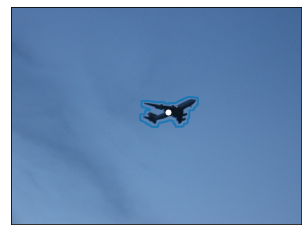

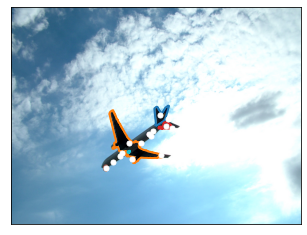

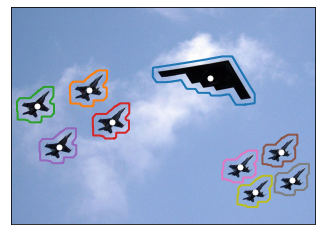

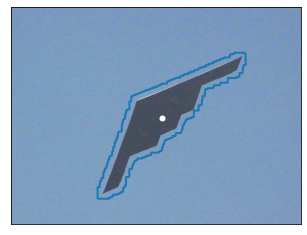

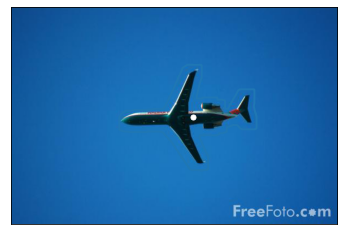

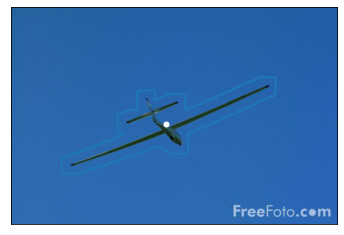

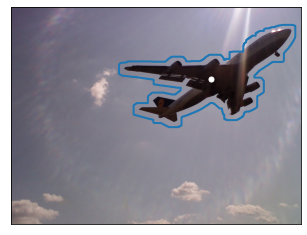

In [13]:
j = 0
for plane in planes:
    if j > -1:
        image = io.imread(plane, as_gray=True)
        if(image.mean() < 0.35):
            th = (1 - (1 - image.mean()))/2
            e = 29
        elif(image.mean() < 0.69):
            th = ((1 - (1 - image.mean()))/2 - 0.011)
            e = 35
        elif(image.mean() > 0.8):
            th = (1 - (1 - image.mean()))/2
            e = 27
        else:
            th = (1 - image.mean())/2
            e = 10
        bw = image > th
        bw = mp.dilation(mp.erosion(bw, mp.square(e)), mp.square(6))
        # Construct some test data
        r = bw
        # Find contours at a constant value of 0.8
        contours = ski.measure.find_contours(r, 0.8)

        # Display the image and plot all contours found
        fig, ax = plt.subplots()
        ax.imshow(r, cmap=plt.cm.gray)
        org_image = io.imread(plane)
        ax.imshow(org_image)
        
        img = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        
        for contour in contours:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
            cc, rr = polygon(contour[:, 1], contour[:, 0])
            img[rr, cc] = 1
            
        label_img = label(img)
        regions = regionprops(label_img)
        for props in regions:
            y0, x0 = props.centroid
            ax.plot(x0, y0, '.w', markersize=10)

        ax.axis('image')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()
        pdf.savefig(fig, dpi=150)
    j += 1
pdf.close()